# Test of neural network
By: Magnus Kvåle Helliesen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neural_network.neural_network import NeuralNetwork

## Setting up a random neural network

In [2]:
nn = NeuralNetwork(100, 50, 2, 2)

## Testing if it learns from only updating the output layer

In [3]:
# Generating a random input array
array1 = np.linspace(0, 1, 100)
array2 = np.linspace(1, 0, 100)

In [4]:
# Without training the neural network does not know how that maps to an output
nn.predict(array1)

array([0.5397844, 0.4602156])

In [5]:
nn.predict(array2)

array([0.53980715, 0.46019285])

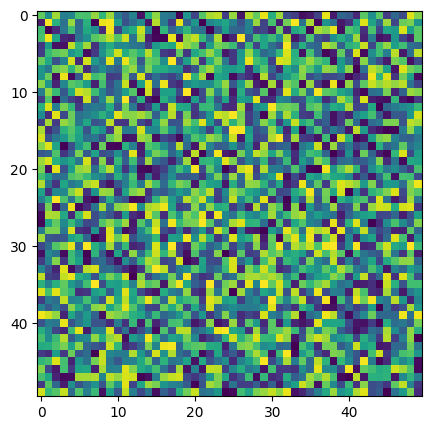

In [6]:
# Heatmap of weights between hidden layer before training
plt.figure(figsize=(5, 5))
plt.imshow(nn.weights[1])
plt.show()

In [7]:
# Making two types of data with some noise
type1_data = tuple(((array1+np.random.normal(size=100)/3, np.array([1, 0])) for _ in range(100)))
type2_data = tuple(((array2+np.random.normal(size=100)/3, np.array([0, 1])) for _ in range(100)))
data = (*type1_data, *type2_data)

In [8]:
# Let's train it
for _ in range(50):
    nn.train(data, 0.01)

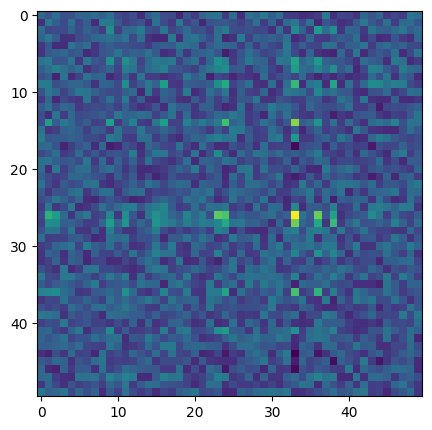

In [9]:
# Heatmap of weights between hidden layer after training
plt.figure(figsize=(5, 5))
plt.imshow(nn.weights[1])
plt.show()

In [10]:
# It already shows improvement, but only slightly...
nn.predict(array1)

array([0.50037604, 0.49962396])

In [11]:
nn.predict(array2)

array([0.49925614, 0.50074386])

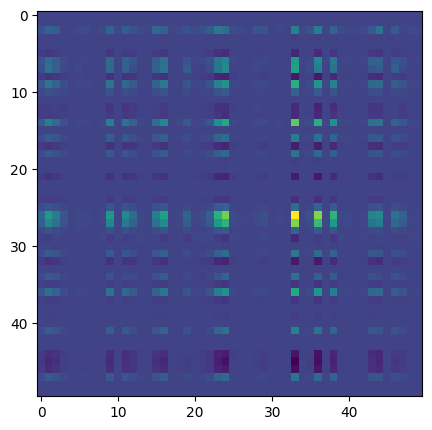

In [12]:
# Heatmap of difference between weights between hidden layer before and after training
plt.figure(figsize=(5, 5))
plt.imshow(nn.weights[1]-nn._weights0[1])
plt.show()